In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Normalization/Share_Review.xlsx', names=['Product', 'Review', 'Rating'])
df.head()

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
2,Cosmetic Organizer/ Storage Box,-,4
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
4,Newari Shahi Pulao Basmati Rice 5 Kg,-,5


In [ ]:
initial_shape = df.shape
df = df[~df["Review"].isin(["", "-"])]
cleaned_shape = df.shape
removed = initial_shape[0] - cleaned_shape[0]
print(f"Removed {removed} non-informative reviews.")



Removed 18002 non-informative reviews.


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16439 entries, 0 to 34438
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  16439 non-null  object
 1   Review   16438 non-null  object
 2   Rating   16439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 513.7+ KB


In [ ]:
df.isnull().sum()


,0
Product,2
Review,1
Rating,0


In [ ]:
df.head()

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
2,Cosmetic Organizer/ Storage Box,-,4
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
4,Newari Shahi Pulao Basmati Rice 5 Kg,-,5


<Axes: xlabel='review_length', ylabel='Count'>

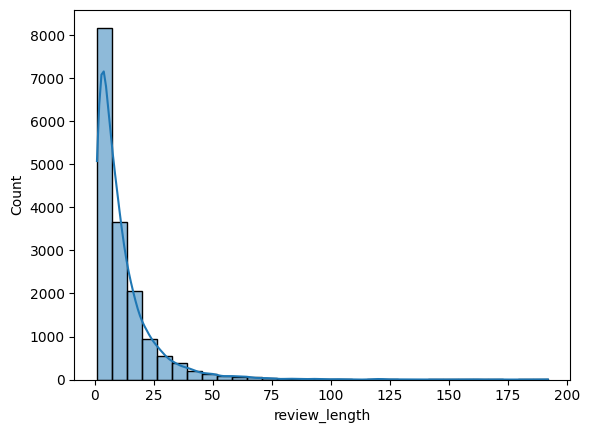

In [ ]:
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
sns.histplot(df['review_length'], bins=30, kde=True)


In [ ]:
long_reviews = df[df['review_length'] > 5000]
print(f"Number of reviews with more than 5000 words: {len(long_reviews)}")

# Display them
for i, row in long_reviews.iterrows():
    print(f"\nReview #{i} - {row['review_length']} words\n")
    print(row['Review'][:1000])  # Just showing first 1000 characters to keep output readable


Number of reviews with more than 5000 words: 0


In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

df.columns



Index(['Product', 'Review', 'Rating', 'review_length'], dtype='object')

In [ ]:
# Now try the boxplot again
sns.boxplot(x='Sentiment', y='Rating', data=df)

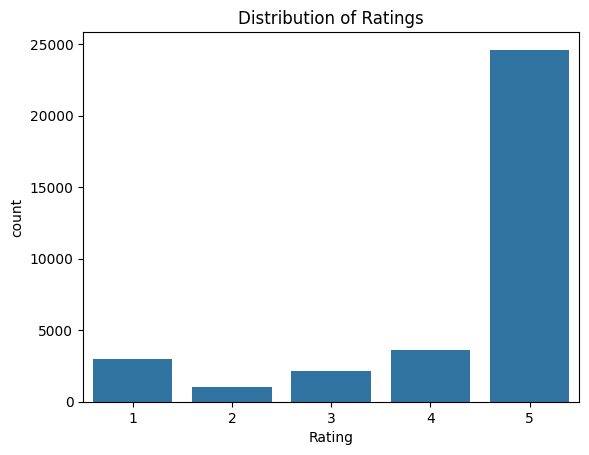

,Rating
count,34441.000000
mean,4.332685
std,1.250251
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating', data=df)
plt.title("Distribution of Ratings")
plt.show()

df['Rating'].describe()


In [ ]:
df = df[~df["Review"].isin(["", "-"])]

In [ ]:
df.Rating.value_counts()

,count
Rating,
5,10967
1,2279
4,1436
3,1063
2,694


In [ ]:
df

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5
...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1


In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not", "aren't", "couldn't", "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"])

In [ ]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [ ]:
df.head(5)

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words, wordnet as wn

# Download necessary resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("words")

# Initialize lemmatizer and spell checker
Lemmatizer = WordNetLemmatizer()

# Load English words dictionary
english_vocab = set(words.words())

# Define stopwords (excluding "not")
Stopwords = set(nltk.corpus.stopwords.words("english")) - {"not"}

def is_strictly_english(word):
    """Check if a word is a valid English word using NLTK dictionary and WordNet."""
    return word.lower() in english_vocab or bool(wn.synsets(word))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import unicodedata

def normalize_unicode_text(text):
    return unicodedata.normalize('NFKD', text)  # Normalizes text to decomposed form

# # Example
# word = "𝐠𝐨𝐨𝐝 𝐠𝐨𝐨𝐝"
# normalized_word = normalize_unicode_text(word)
# print(normalized_word)
# normalized_word.lower() in english_vocab or bool(wn.synsets(normalized_word))

In [ ]:
import re

# Function to remove all emojis using Unicode ranges
def remove_emojis(text):
    # Define a regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols and pictographs
        "\U0001F680-\U0001F6FF"  # Transport and map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric shapes
        "\U0001F800-\U0001F8FF"  # Supplemental arrows
        "\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
        "\U0001FA00-\U0001FA6F"  # Chess symbols
        "\U0001FA70-\U0001FAFF"  # Symbols for legacy computing
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed characters
        "]", flags=re.UNICODE
    )

    # Replace emojis with a space
    return emoji_pattern.sub(" ", text)

# Example string with emojis
text = "🙏🏻♥️masala bujado majjako 🙏🏻🙏🏻 sakthyo yeshlai tamika duitai😑😑"

# Remove all emojis
updated_text = remove_emojis(text)

print(updated_text)


    masala bujado majjako      sakthyo yeshlai tamika duitai  


In [ ]:
import re

# Function to check if text contains Devanagari script
def contains_devanagari(text):
    if isinstance(text, str):  # Ensure the input is a string
        return bool(re.search(r'[\u0900-\u097F]', text))
    return False

In [ ]:
df = df[~df["Review"].apply(contains_devanagari)]

In [ ]:
PREDEFINED_WORD=["positiveemoji", "negativeemoji", "facebook", "motherboard", "bhatbateni", "bluetooth"]

In [ ]:
df.head()

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5


In [ ]:
import re

# Define a dictionary of common merged words and their correct form
MERGED_WORDS = {
    "thankyou": "thank you",
    "nthankyou":  "thank you",
    "nthankyouu":  "thank you",
    "thankyouuu":  "thank you",
    "nthankyouu":  "thank you",
    "goodmorning": "good morning",
    "goodnight": "good night",
    "checkout": "check out",
    "wanna": "want to",
    "gonna": "going to",
    "cant": "can't",
    "dont": "don't",
    "doesnt": "doesn't",
    "isnt": "isn't",
    "havent": "haven't",
    "ive": "I've",
    "yall": "you all",
    "pls": "please",
    "ur": "your",
    "u": "you",
    "luv": "love",
    "goodjob": "good job"
}

def separate_merged_words(text):
    """Splits commonly merged words in a given text."""
    for merged, correct in MERGED_WORDS.items():
        text = re.sub(rf"\b{merged}\b", correct, text, flags=re.IGNORECASE)
    return text

In [ ]:
nepali_stop_words = ["ma", "timi", "tapai", "hami", "usle", "uniharule", "yo", "tyo", "kunai", "ek", "dui", "tin", "euta", "duita", "kehi", "thuprai", "sabai",
"ra", "athawa", "tara", "jastai", "bhane", "ani", "kina ki",
"ma", "bata", "samma", "sanga", "pachhi", "agadi",
"cha", "chha", "thiye", "huncha", "bhayo", "garna",
"ke", "kahile", "kata", "kina", "kasari", "ko", "kasko",
"ho", "ni", "hai", "ta", "le", "nai", "pani", "matra", "dherai", "ki", "raixa", "xa", "vane"]

In [ ]:
all_stop_words = list(Stopwords) + list(set(nepali_stop_words))

In [ ]:
import re

# Define emoji categories
positive_emojis = [
    "😀", "😃", "😄", "😁", "😆", "😅", "😂", "🤣", "😊", "😇",
    "🙂", "🙃", "😉", "😌", "😍", "🥰", "😘", "😗", "😙", "😚",
    "🤩", "🥳", "💖", "❤️", "💙", "💚", "💛", "💜", "💞", "💕",
    "💓", "💗", "💝", "💟", "👍", "👏", "🤗", "👌", "🙏", "✨", "💯", "🔥", "😎", "✅", "🌟", "☺️", "😋",
    "🌻", "🥹", "♥️", "⭐️", "🫣", "✌️", "❤", "🤭", "❣️", "😝", "🫶🏻", "🤝"
]

negative_emojis = [
    "😞", "😟", "😠", "😡", "😢", "😭", "😣", "😖", "😫", "😩",
    "🥺", "😤", "😥", "😰", "😨", "😧", "😦", "😔", "☹️", "🙁",
    "👎", "💔", "😏", "😕", "😒", "😡", "😏", "🤧", "😴", "🤨", "🥲", "🤬", "🤦🏽", "👿", "😿", "🙄", "🥲"
]

def emoji(review_data):
    # Replace positive emojis
    for emoji in positive_emojis:
        review_data = review_data.replace(emoji, " positiveemoji ")

    # Replace negative emojis
    for emoji in negative_emojis:
        review_data = review_data.replace(emoji, " negativeemoji ")

    return review_data

In [ ]:
import re
import string

def Text_Cleaning(Text):
    if not isinstance(Text, str):  # Check if input is a string
        print(Text)
        return ""  # Return empty string for NaN or non-string values

    # Lowercase the text
    Text = Text.lower()

    # Remove punctuations
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Remove numbers
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub(r'https?://\S+|www\.\S+', '', Text)

    # Delete newlines
    Text = re.sub(r'\n', '', Text)

     # Replace emoji with text
    Text = emoji(Text)

    return Text

In [ ]:
df.dropna()

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5
...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1


In [ ]:
df["clean_reviews"] = df["Review"].apply(lambda Text: Text_Cleaning(Text))

nan


<ipython-input-26-818c7bbe78aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_reviews"] = df["Review"].apply(lambda Text: Text_Cleaning(Text))


In [ ]:
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer


def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()
  Text = separate_merged_words(Text)
  Text = remove_emojis(Text)
  normalized_word = normalize_unicode_text(Text)

  # Tokens of Words
  Tokens = nltk.word_tokenize(normalized_word)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in all_stop_words:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt_tab')

df["cleaned_reviews"] = df["clean_reviews"].apply(lambda Text: Text_Processing(Text))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-28-56d526097dfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaned_reviews"] = df["clean_reviews"].apply(lambda Text: Text_Processing(Text))


In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...
...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good lagaune manxe thiyena bigriyo...
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare hun...


In [ ]:
# non_english_word =  []
# for Text in df['cleaned_reviews']:
#     # Text = remove_emojis(Text)
#     # normalized_word = normalize_unicode_text(Text)
#     Tokens = nltk.word_tokenize(Text)

#     for word in Tokens:
#         if not is_strictly_english(word) and word not in PREDEFINED_WORD:
#             non_english_word.append(word)

In [ ]:
# print(len(non_english_word))
# unique_words = list(set(non_english_word))

# print("Unique words:", len(unique_words))

In [ ]:
# import pandas as pd

# # Create a DataFrame from the list
# df_nepali = pd.DataFrame(unique_words, columns=['Words'])

# # Save the DataFrame to a CSV file
# df_nepali.to_csv('words_list.csv', index=False)

# print("CSV file saved as 'words_list.csv'")


In [ ]:
filtered_df = pd.read_csv('/content/drive/MyDrive/Normalization/words_frequency_normalize_list.csv')
filtered_df.head()

,Devanagari,Words,word_counts,Selected_Word
0,अएको,"['aayeko', 'aayako']","{'aayeko': 7, 'aayako': 1}",aayeko
1,अक्दम्,"['aakdam', 'akdam']","{'aakdam': 8, 'akdam': 13}",akdam
2,अझ,"['aajha', 'ajha']","{'aajha': 1, 'ajha': 10}",ajha
3,अझै,"['aajhai', 'ajhai']","{'aajhai': 2, 'ajhai': 21}",ajhai
4,अड्किन्छ,"['adkincha', 'adkinxa']","{'adkincha': 1, 'adkinxa': 1}",adkincha


In [ ]:
import pandas as pd
import re

# Create a mapping of alternative words to the selected word
replacement_dict = {}
for _, row in filtered_df.iterrows():
    for word in eval(row['Words']):  # Ensure list conversion if stored as a string
        replacement_dict[word] = row['Selected_Word']

# Function to normalize text without removing spaces
def normalize_text(text, replacement_dict):
    words = text.split()  # Split into words to preserve spaces
    normalized_words = [replacement_dict.get(word, word) for word in words]  # Replace only if in dict
    return " ".join(normalized_words)  # Join back with spaces

# Apply normalization
df['normalized_reviews'] = df['cleaned_reviews'].apply(lambda x: normalize_text(x, replacement_dict))

df[['cleaned_reviews', 'normalized_reviews']].head()


<ipython-input-31-eddf998cabe4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_reviews'] = df['cleaned_reviews'].apply(lambda x: normalize_text(x, replacement_dict))


,cleaned_reviews,normalized_reviews
0,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...
1,good according price material chai ali thin co...,good according price material chai ali thin co...
3,ordered product mom love,ordered product mom love
6,nice useful,nice useful
8,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...


In [ ]:
df.shape

(16076, 6)

In [ ]:
df.normalized_reviews.value_counts()

,count
normalized_reviews,
good,355
nice,301
good product,185
nice product,133
ramro,93
...,...
okay according price,1
came well packaged condition good new comfortable wear pricier side still affordable compared original nike filum adidas comfortable look cool sock matter,1
got time like shown picture really enjoyed shopping positiveemoji,1


In [ ]:
import pandas as pd
import re

# Define sentiment words
positive_words = {"good product", "nice product", "ramro xa", "good quality", "product good",
                  "thank daraz", "really good", "thank much", "satisfied product", "ramro lagyo",
                  "quality good", "fast delivery", "ramro cha", "price range", "love product",
                  "good price", "ekdam ramro", "quality product", "best product"}

negative_words = {"not good", "not working", "waste money", "not satisfied",
                  "product not", "low quality", "different product", "quality not",
                  "not buy", "wrong product", "worst product", "not expected", "poor quality",
                  "damaged product", "not shown", "bad product", "completely different", 'ramro xaena'}

neutral_words = {"not bad", "thikai xa", "quality not", "xa tara", "not expected",
                 "product not", "per price", "thikai cha", "little bit", "thik xa"}

negation_words = {"not", "no", "never", "without"}  # List of negation words

def labelling(row):
    if row["Rating"] > 3.0:
        return "Positive"
    elif row["Rating"] < 3.0:
        return "Negative"
    else:
        return "Neutral"

def contains_negation(text, phrase):
    """
    Check if the given phrase has a negation word before it.
    """
    words = text.split()
    phrase_words = phrase.split()

    for i in range(len(words) - len(phrase_words) + 1):
        # Check if phrase matches
        if words[i:i + len(phrase_words)] == phrase_words:
            # Look for negation before this phrase
            if i > 0 and words[i - 1] in negation_words:
                return True
    return False

def second_level_validation(row):
    text = row["cleaned_reviews"]

    detected_sentiment = None  # Track sentiment change
    for phrase in positive_words:
        if phrase in text:
            if not contains_negation(text, phrase):
                detected_sentiment = "Positive"
                break

    for phrase in negative_words:
        if phrase in text:
            detected_sentiment = "Negative"
            break

    for phrase in neutral_words:
        if phrase in text:
            detected_sentiment = "Neutral"
            break

    # Print cases where changes happen
    if detected_sentiment and detected_sentiment != row["sentiment"]:
        print(f"Review: {row['cleaned_reviews']}\nOriginal: {row['sentiment']} -> New: {detected_sentiment}\n")

    return detected_sentiment if detected_sentiment else row["sentiment"]

# Sample DataFrame
data = {
    "Review": ["piece panty received instead piece packet different size not satisfied product service daraz",
               "one satisfied purchase daraz heartfelt thankful delivery team friendly helpful nbeside everyone know lg ’ product one buy product without single thought nthankful lg cg daraz n", "piece panty received instead piece packet different size not satisfied product service daraz"],
    "Rating": [3, 5, 1],
    "cleaned_reviews": ["piece panty received instead piece packet different size not satisfied product service daraz",
                        "one satisfied purchase daraz heartfelt thankful delivery team friendly helpful nbeside everyone know lg ’ product one buy product without single thought nthankful lg cg daraz n", "piece panty received instead piece packet different size not satisfied product service daraz"]
}

new_df = pd.DataFrame(data)

# First level sentiment assignment
new_df["sentiment"] = df.apply(labelling, axis=1)

new_df["new_sentiment"] = new_df.apply(second_level_validation, axis=1)

# Show rows where sentiment changed
new_mismatched_rows = new_df[new_df["sentiment"] != new_df["new_sentiment"]]

# Debugging output
print("\nFinal Changed Sentiments:")
print(new_mismatched_rows[["cleaned_reviews", "sentiment", "new_sentiment"]])



In [ ]:
def Labelling(Rows):
  if(Rows["Rating"] > 3.0):
    Label = "Positive"
  elif(Rows["Rating"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
df["sentiment"] = df.apply(Labelling, axis = 1)

<ipython-input-36-4f1fef45f828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df.apply(Labelling, axis = 1)


In [ ]:
# Second level sentiment correction with negation handling
df["new_sentiment"] = df.apply(second_level_validation, axis=1)

# Show rows where sentiment changed
mismatched_rows = df[df["sentiment"] != df["new_sentiment"]]

In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...,Neutral,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...,good according price material chai ali thin co...,Positive,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,ordered product mom love,Positive,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,nice useful,Positive,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...,Positive,Positive
...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good lagaune manxe thiyena bigriyo...,ahhh tattoo good lagaune manxe thiyena bigriyo...,Positive,Positive
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,got damaged product,Negative,Negative
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,windproof waterproof warm fur inside material ...,Positive,Positive
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare hun...,maile magako color purple aayo pink j gare hun...,Negative,Negative


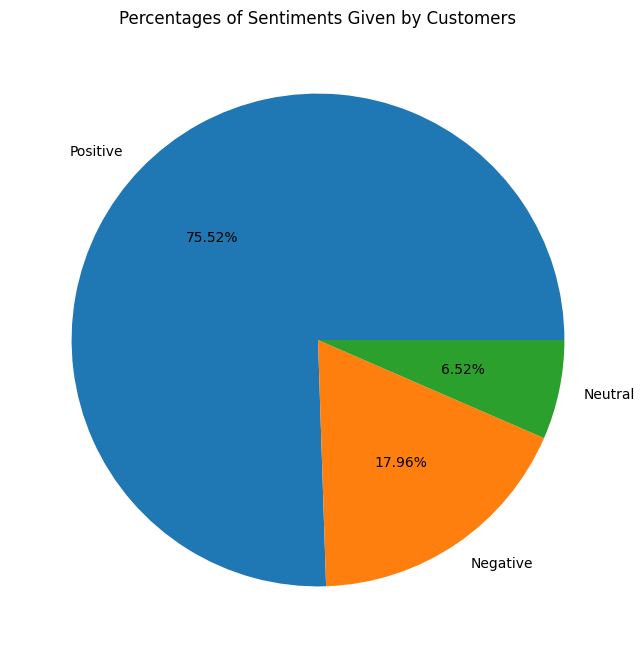

In [ ]:
import matplotlib.pyplot as plt

# Sample DataFrame (Assuming Sentiment column exists)
df["sentiment"].value_counts().plot(
    kind="pie",
    legend=False,
    autopct="%1.2f%%",
    fontsize=10,
    figsize=(8, 8)
)

plt.title("Percentages of Sentiments Given by Customers", loc="center")
plt.ylabel("")  # Hide y-axis label
plt.show()


In [ ]:
len(df)

16076

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,12141
Negative,2887
Neutral,1048


In [ ]:
df.isnull().sum()

,0
Product,0
Review,1
Rating,0
clean_reviews,0
cleaned_reviews,0
normalized_reviews,0
sentiment,0
new_sentiment,0


In [ ]:
df.Rating.value_counts()

,count
Rating,
5,10746
1,2213
4,1395
3,1048
2,674


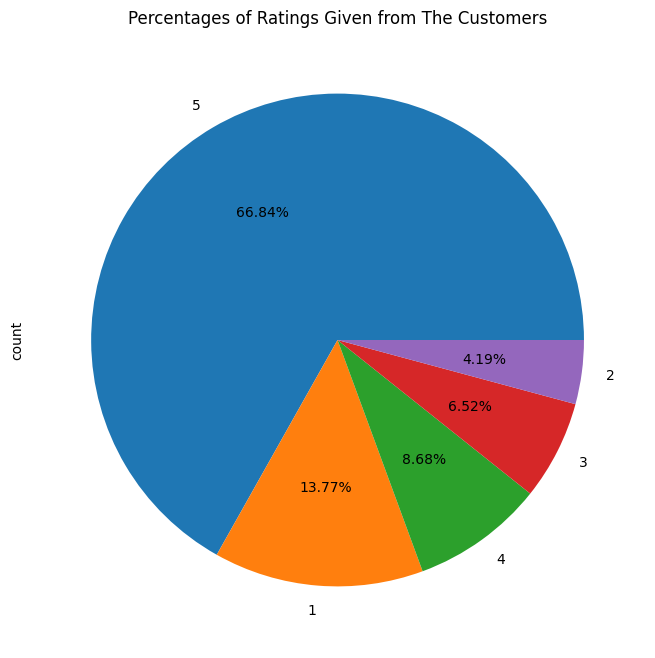

In [ ]:
df.Rating.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

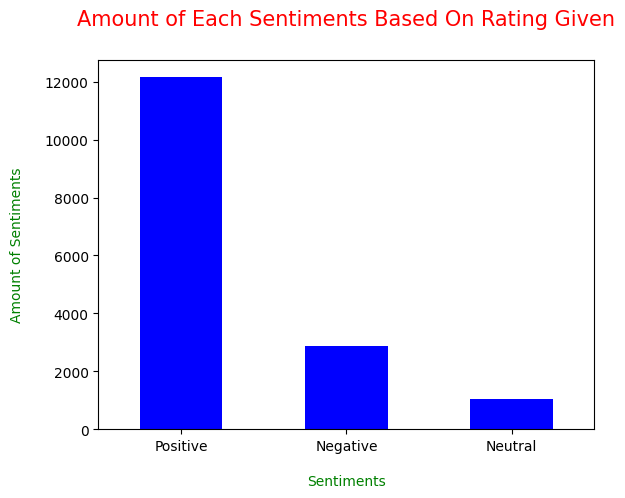

In [ ]:
df["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
df.describe(include = "all")

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment
count,16076,16075,16076.000000,16076,16076,16076,16076,16076
unique,8457,10193,NaN,9876,9211,9203,3,3
top,Winter Beanie Hat Scarf Set Warm Knit Hat Thic...,good,NaN,good,good,good,Positive,Positive
freq,44,154,NaN,246,355,355,12141,11984
mean,NaN,NaN,4.106432,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.459135,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["polarity"] = df["normalized_reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

<ipython-input-49-779995401094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity"] = df["normalized_reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)


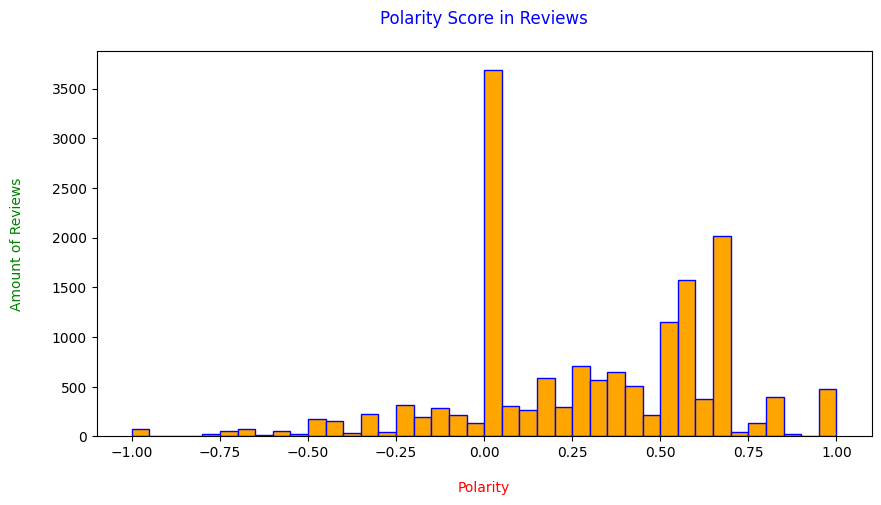

In [ ]:
df["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
df.head()

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment,polarity
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...,Neutral,Neutral,0.300000
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...,good according price material chai ali thin co...,Positive,Positive,0.233333
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,ordered product mom love,Positive,Positive,0.500000
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,nice useful,Positive,Positive,0.450000
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...,Positive,Positive,0.240303


In [ ]:
df["length"] = df["normalized_reviews"].astype(str).apply(len)

<ipython-input-52-070b81a97b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length"] = df["normalized_reviews"].astype(str).apply(len)


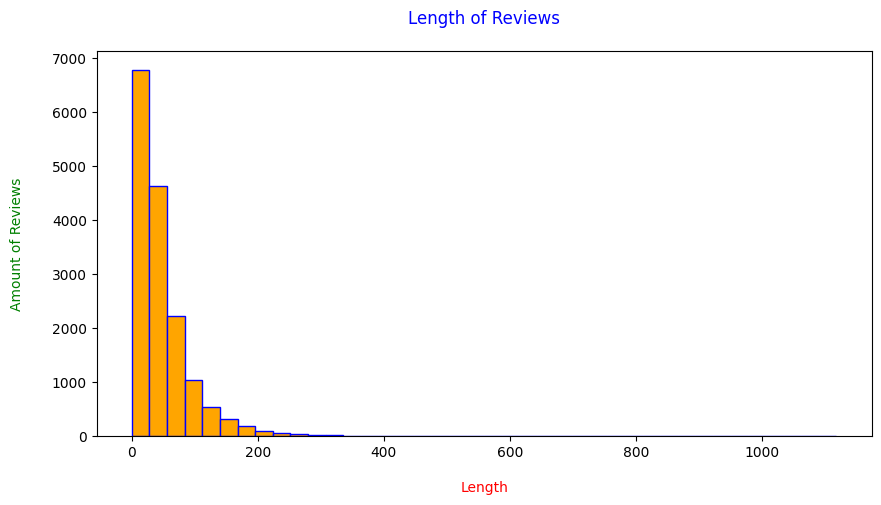

In [ ]:
df["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
df["word_counts"] = df["normalized_reviews"].apply(lambda x: len(str(x).split()))

<ipython-input-54-c57f3df26d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_counts"] = df["normalized_reviews"].apply(lambda x: len(str(x).split()))


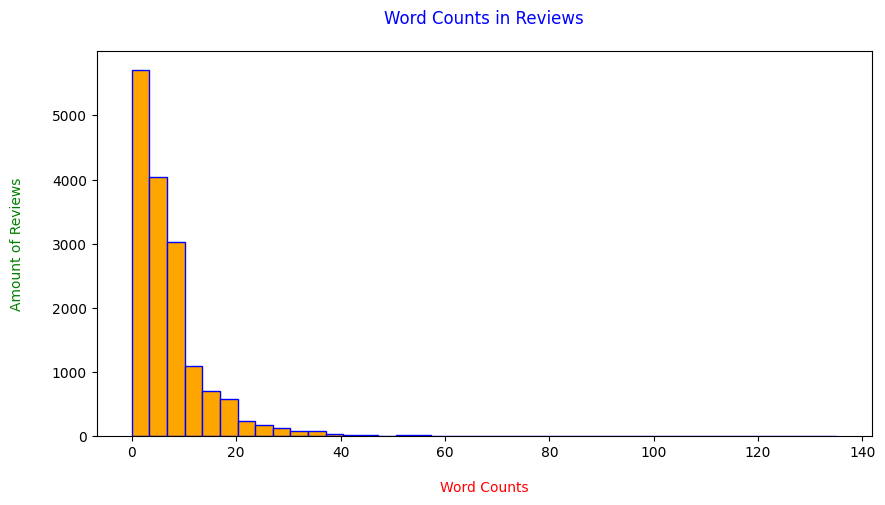

In [ ]:
df["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [ ]:

# Use dropna() so the base DataFrame is not affected
Positive = df[df["new_sentiment"] == "Positive"].dropna()
Neutral = df[df["new_sentiment"] == "Neutral"].dropna()
Negative = df[df["new_sentiment"] == "Negative"].dropna()

In [ ]:
Stopwords = list(Stopwords)

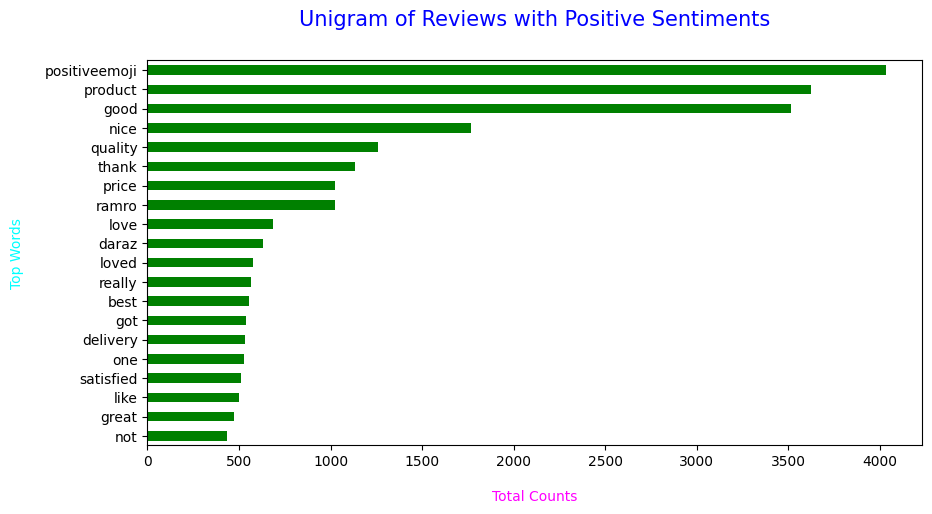

In [ ]:

# Finding Unigram
words = Gram_Analysis(Positive["normalized_reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

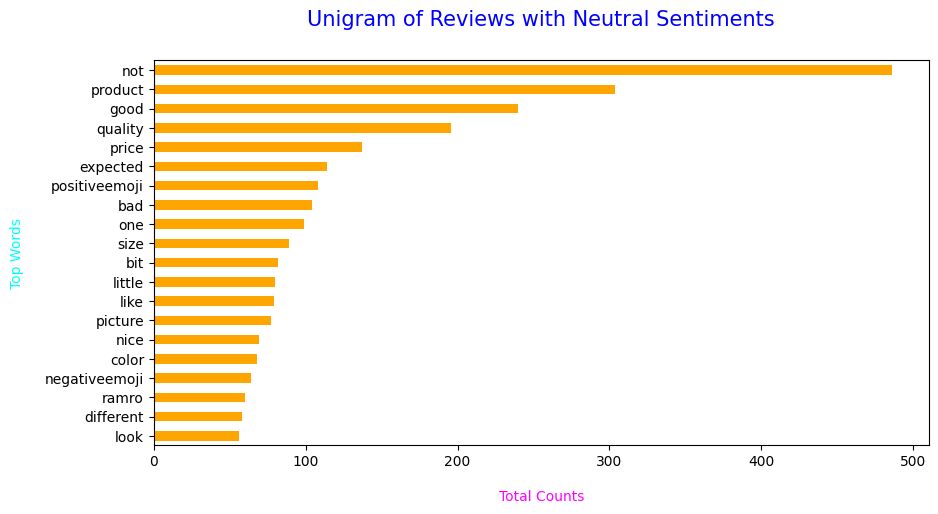

In [ ]:
# Finding Unigram
words = Gram_Analysis(Neutral["normalized_reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


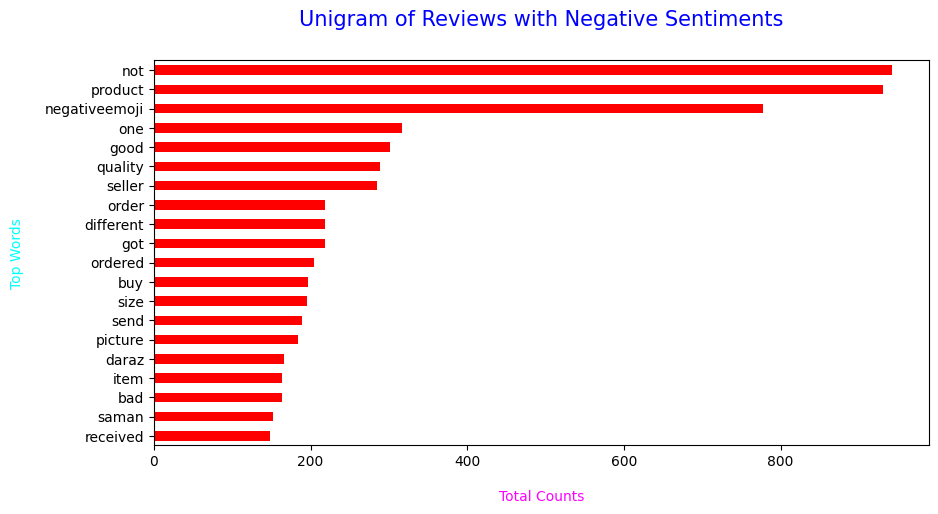

In [ ]:
# Finding Unigram
words = Gram_Analysis(Negative["normalized_reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


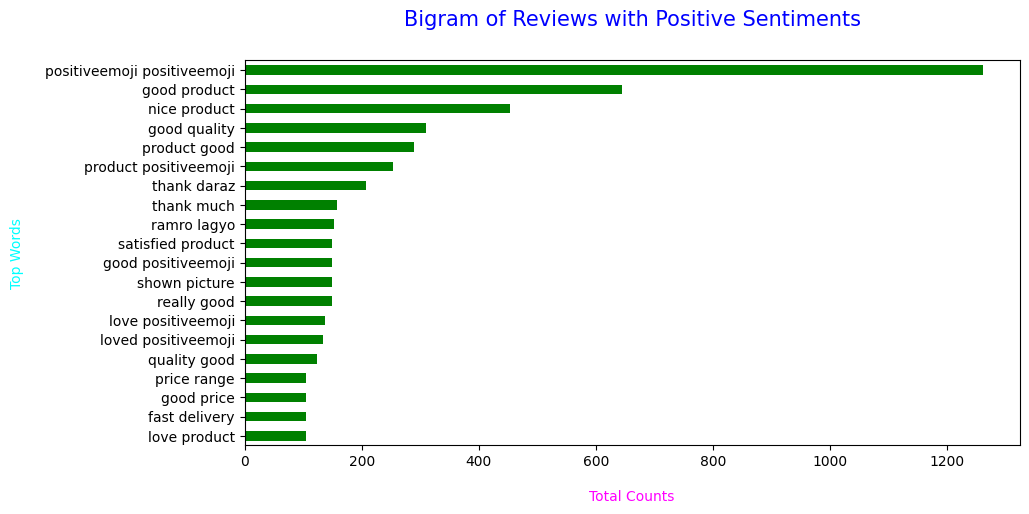

In [ ]:
# Finding Bigram
words = Gram_Analysis(Positive["normalized_reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


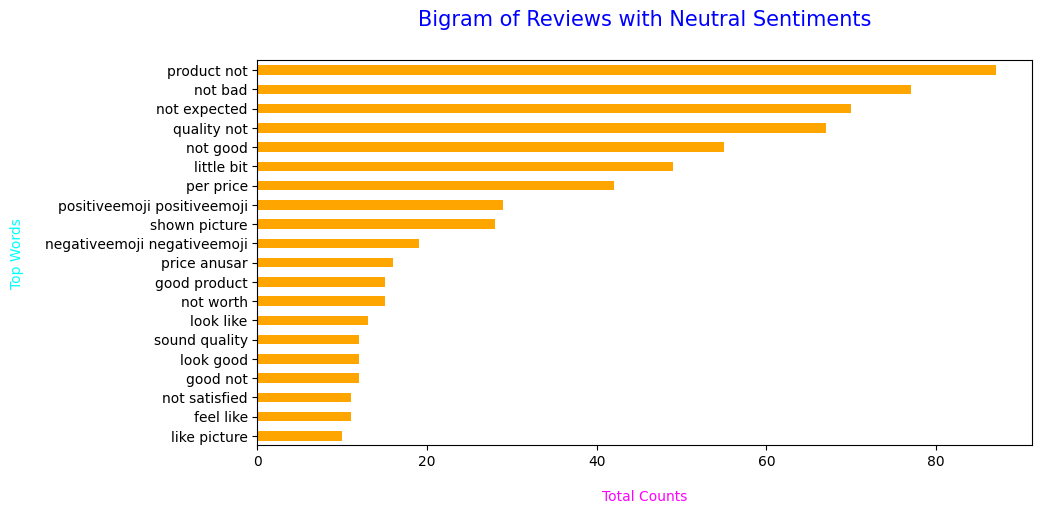

In [ ]:
# Finding Bigram
words = Gram_Analysis(Neutral["normalized_reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

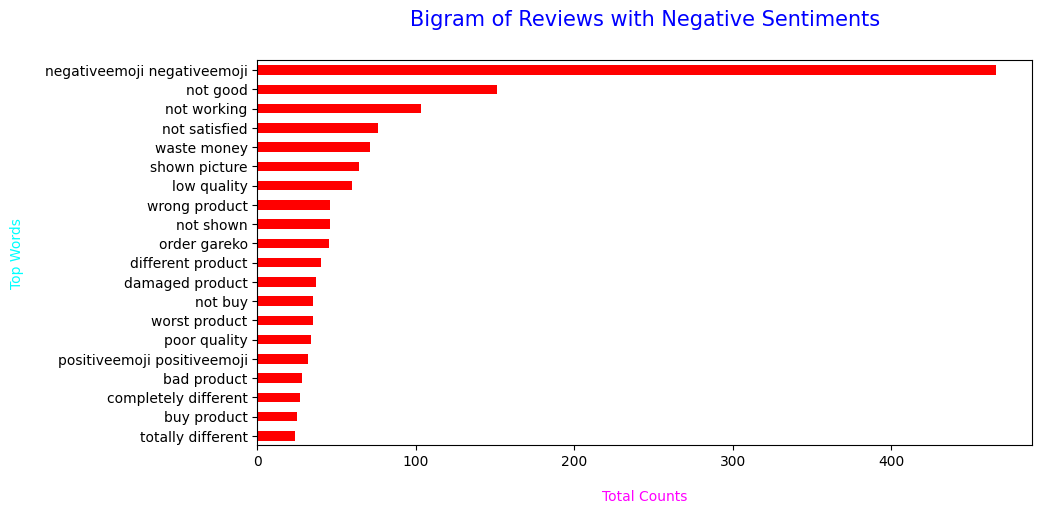

In [ ]:
# Finding Bigram
words = Gram_Analysis(Negative["normalized_reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


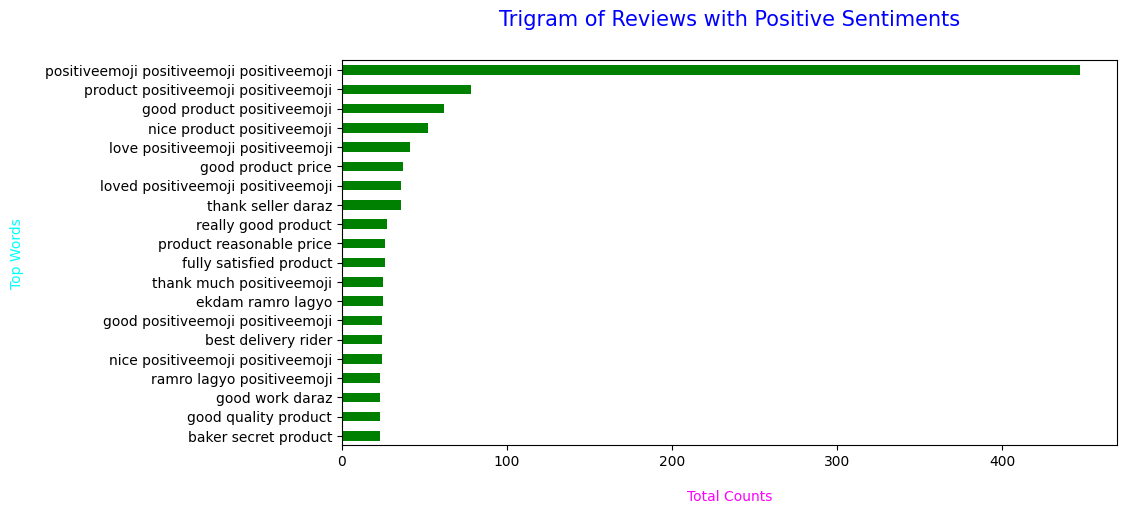

In [ ]:
# Finding Trigram
words = Gram_Analysis(Positive["normalized_reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


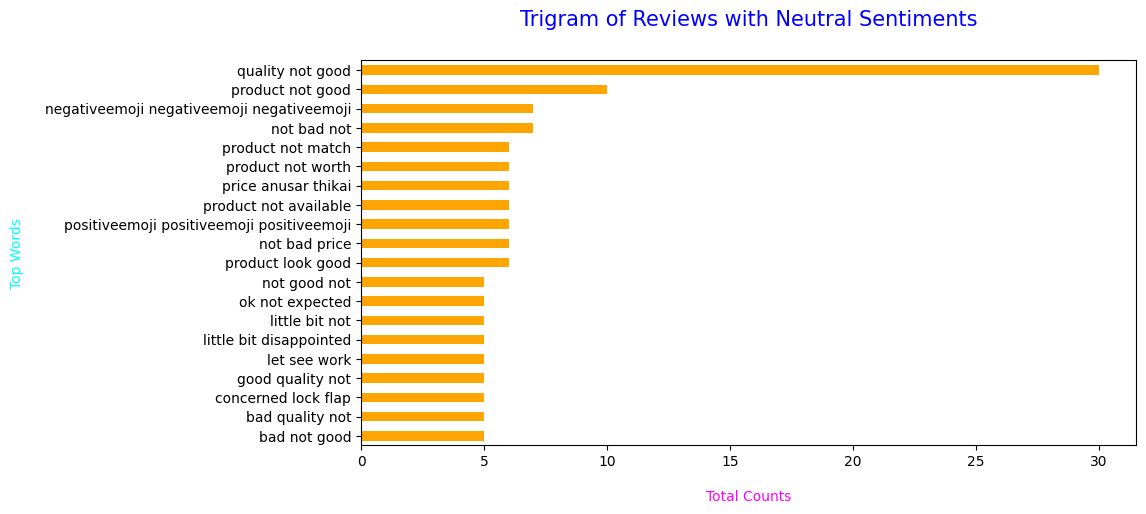

In [ ]:
# Finding Trigram
words = Gram_Analysis(Neutral["normalized_reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


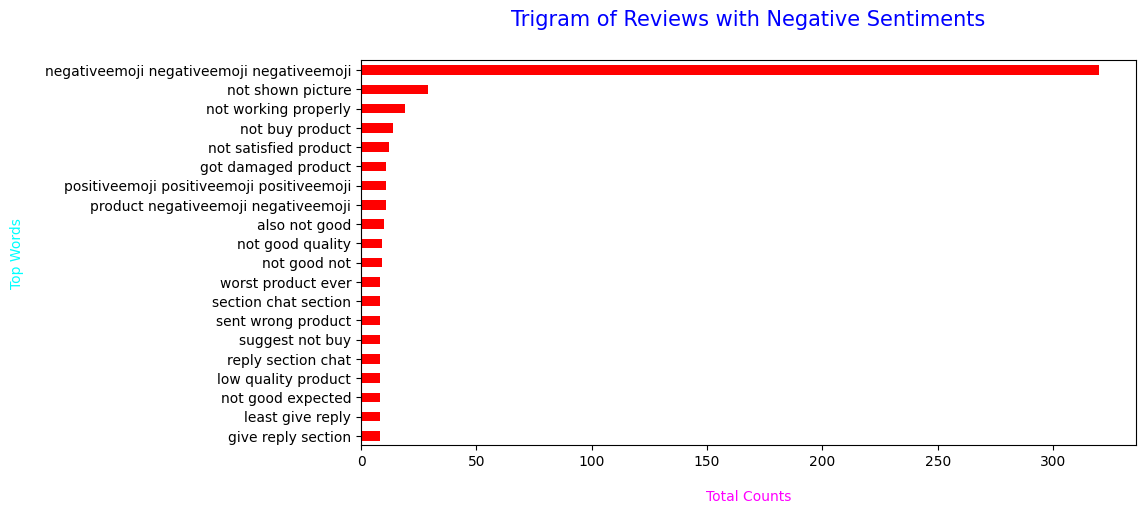

In [ ]:

# Finding Trigram
words = Gram_Analysis(Negative["normalized_reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment,polarity,length,word_counts
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...,Neutral,Neutral,0.300000,55,9
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...,good according price material chai ali thin co...,Positive,Positive,0.233333,64,9
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,ordered product mom love,Positive,Positive,0.500000,24,4
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,nice useful,Positive,Positive,0.450000,11,2
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...,Positive,Positive,0.240303,256,38
...,...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good lagaune manxe thiyena bigriyo...,ahhh tattoo good lagaune manxe thiyena bigriyo...,Positive,Positive,0.700000,138,20
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,got damaged product,Negative,Negative,0.000000,19,3
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,windproof waterproof warm fur inside material ...,Positive,Positive,0.383333,73,10
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare hun...,maile magako color purple aayo pink j gare hun...,Negative,Negative,-0.100000,65,13


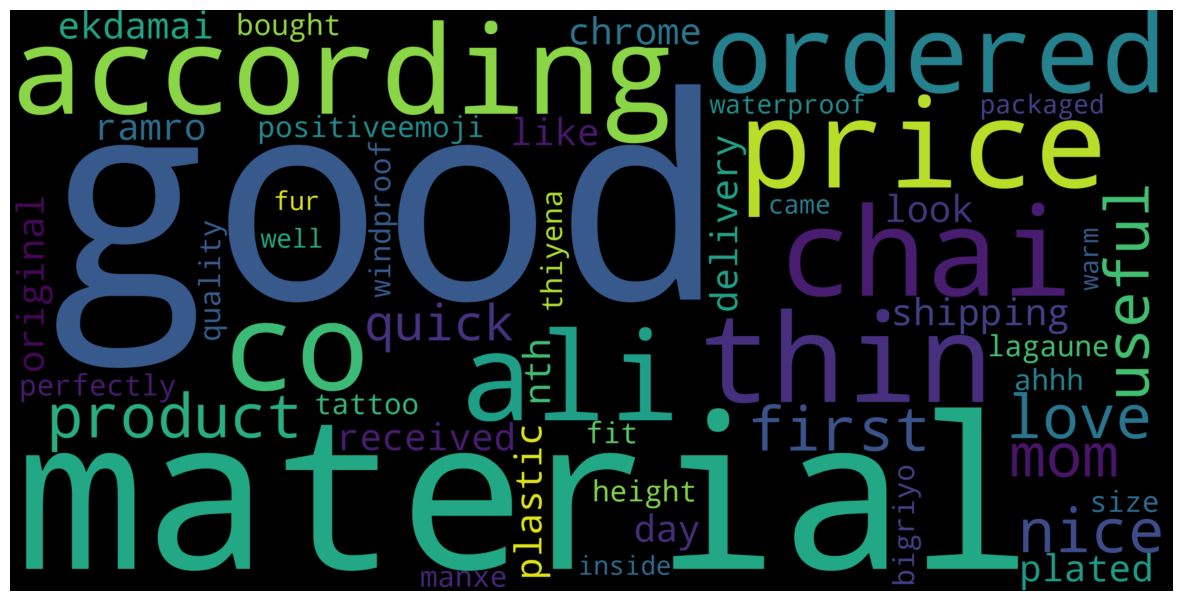

In [ ]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["normalized_reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

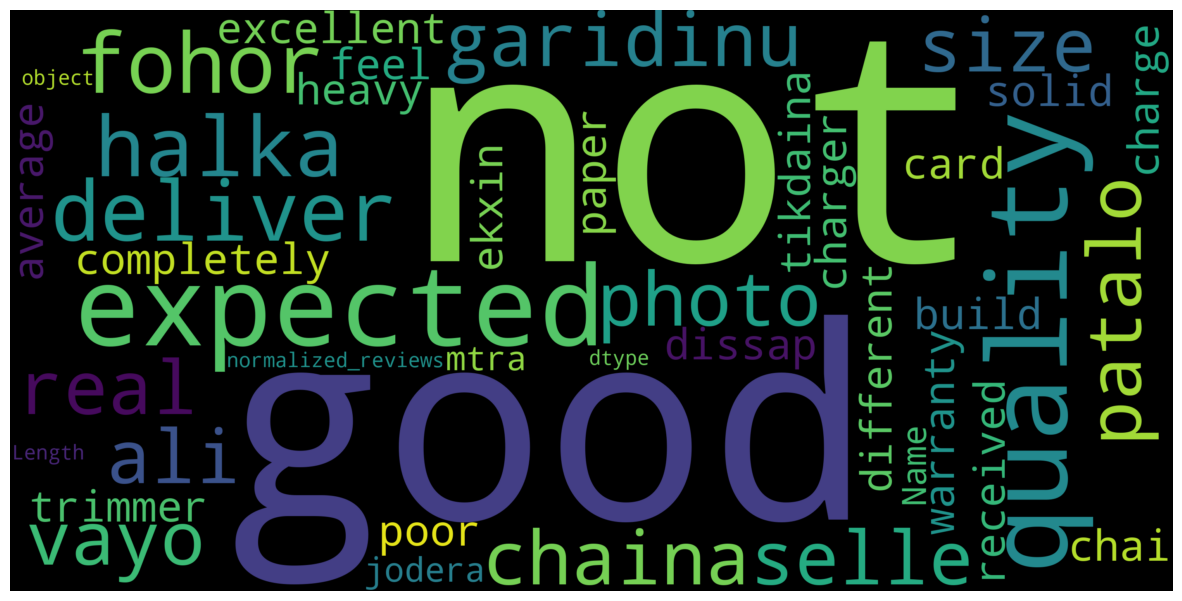

In [ ]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["normalized_reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

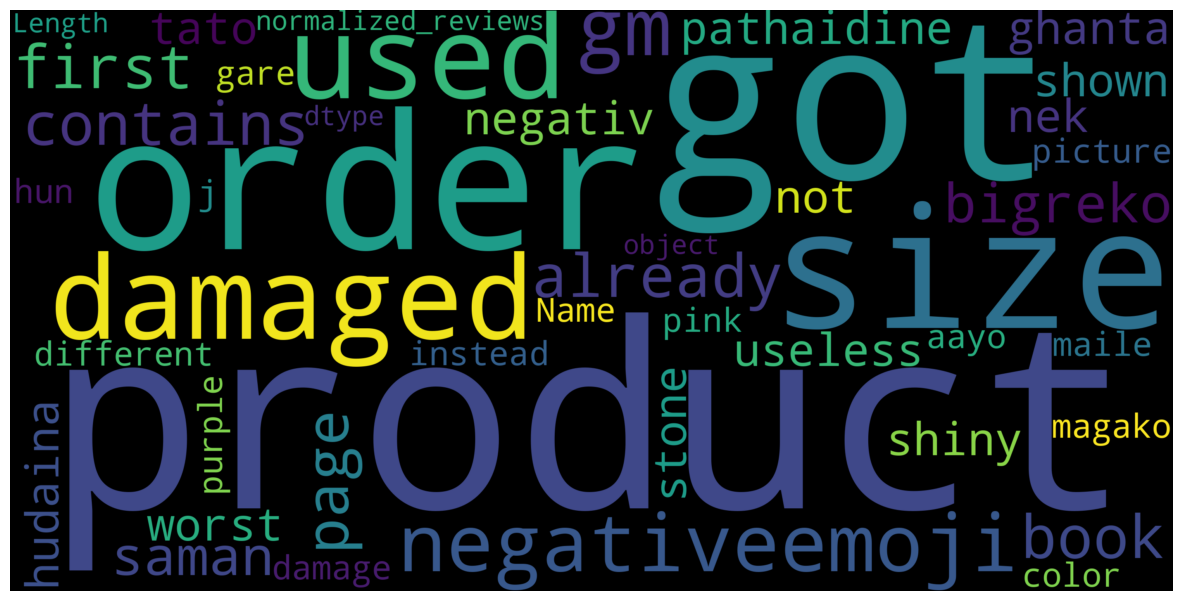

In [ ]:

wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["normalized_reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.head(5)

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment,polarity,length,word_counts
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...,Neutral,Neutral,0.300000,55,9
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...,good according price material chai ali thin co...,Positive,Positive,0.233333,64,9
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,ordered product mom love,Positive,Positive,0.500000,24,4
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,nice useful,Positive,Positive,0.450000,11,2
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...,Positive,Positive,0.240303,256,38


In [ ]:

# Columns = ["Product", "Review", "Rating", "clean_reviews", "cleaned_reviews", "polarity", "length", "word_counts", "new_sentiment"]
# df.drop(columns = Columns, axis = 1, inplace = True)

In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment,polarity,length,word_counts
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...,Neutral,Neutral,0.300000,55,9
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...,good according price material chai ali thin co...,Positive,Positive,0.233333,64,9
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,ordered product mom love,Positive,Positive,0.500000,24,4
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,nice useful,Positive,Positive,0.450000,11,2
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...,Positive,Positive,0.240303,256,38
...,...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good lagaune manxe thiyena bigriyo...,ahhh tattoo good lagaune manxe thiyena bigriyo...,Positive,Positive,0.700000,138,20
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,got damaged product,Negative,Negative,0.000000,19,3
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,windproof waterproof warm fur inside material ...,Positive,Positive,0.383333,73,10
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare hun...,maile magako color purple aayo pink j gare hun...,Negative,Negative,-0.100000,65,13


In [ ]:
Encoder = LabelEncoder()
df["sentiment"] = Encoder.fit_transform(df["sentiment"])

<ipython-input-75-b505f39d3ce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = Encoder.fit_transform(df["sentiment"])


In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,normalized_reviews,sentiment,new_sentiment,polarity,length,word_counts
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good halka fohor deliver garidinu vayo selle...,’ good halka fohor deliver garidinu vayo selle...,1,Neutral,0.300000,55,9
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin co...,good according price material chai ali thin co...,2,Positive,0.233333,64,9
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,ordered product mom love,2,Positive,0.500000,24,4
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,nice useful,2,Positive,0.450000,11,2
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,first quick shipping delivery received day nth...,2,Positive,0.240303,256,38
...,...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good lagaune manxe thiyena bigriyo...,ahhh tattoo good lagaune manxe thiyena bigriyo...,2,Positive,0.700000,138,20
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,got damaged product,0,Negative,0.000000,19,3
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,windproof waterproof warm fur inside material ...,2,Positive,0.383333,73,10
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare hun...,maile magako color purple aayo pink j gare hun...,0,Negative,-0.100000,65,13


In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
2,12141
0,2887
1,1048


In [ ]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["normalized_reviews"])

# Check our matrix shape
X.shape

(16076, 5000)

In [ ]:

# Declaring our target variable
y = df["sentiment"]

In [ ]:
Counter(y)

Counter({1: 1048, 2: 12141, 0: 2887})

In [ ]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [ ]:

Counter(y_final)

Counter({1: 12141, 2: 12141, 0: 12141})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.15, random_state = 42)

In [ ]:
LogReg = LogisticRegression()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [LogReg, Bayes, KNN]
Models_Dict = {0: "Logistic Regression",1: "Naive Bayes", 2: "K-Neighbors"}



In [ ]:
for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Logistic Regression Test Accuracy: 0.8340977904503617
Naive Bayes Test Accuracy: 0.8125764689310138
K-Neighbors Test Accuracy: 0.796962681923302


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Convert X to a dense array if it's a sparse matrix
if hasattr(X, 'toarray'):  # Check if X is a sparse matrix
    X = X.toarray()

# Define the metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}
for i, model in enumerate(Models):
  print(f'{model}')
  # Use cross_validate to calculate all metrics
  results = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=False)

  # Print the results
  print(f"Accuracy: {results['test_accuracy'].mean():.4f}")
  print(f"Precision: {results['test_precision'].mean():.4f}")
  print(f"Recall: {results['test_recall'].mean():.4f}")
  print(f"F1-Score: {results['test_f1'].mean():.4f}")


LogisticRegression()
Accuracy: 0.8341
Precision: 0.8184
Recall: 0.8341
F1-Score: 0.7977
BernoulliNB()
Accuracy: 0.8126
Precision: 0.7889
Recall: 0.8126
F1-Score: 0.7918
KNeighborsClassifier()
Accuracy: 0.8141
Precision: 0.7915
Recall: 0.8141
F1-Score: 0.7806
